In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

## Network
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import pylab as plt 
from itertools import count 
from operator import itemgetter 
from networkx.drawing.nx_agraph import graphviz_layout 
import pylab

In [2]:
df = pd.read_csv('member-edges.csv')
print(len(df))

1176368


In [3]:
df = df[0 : 1000]


No handles with labels found to put in legend.


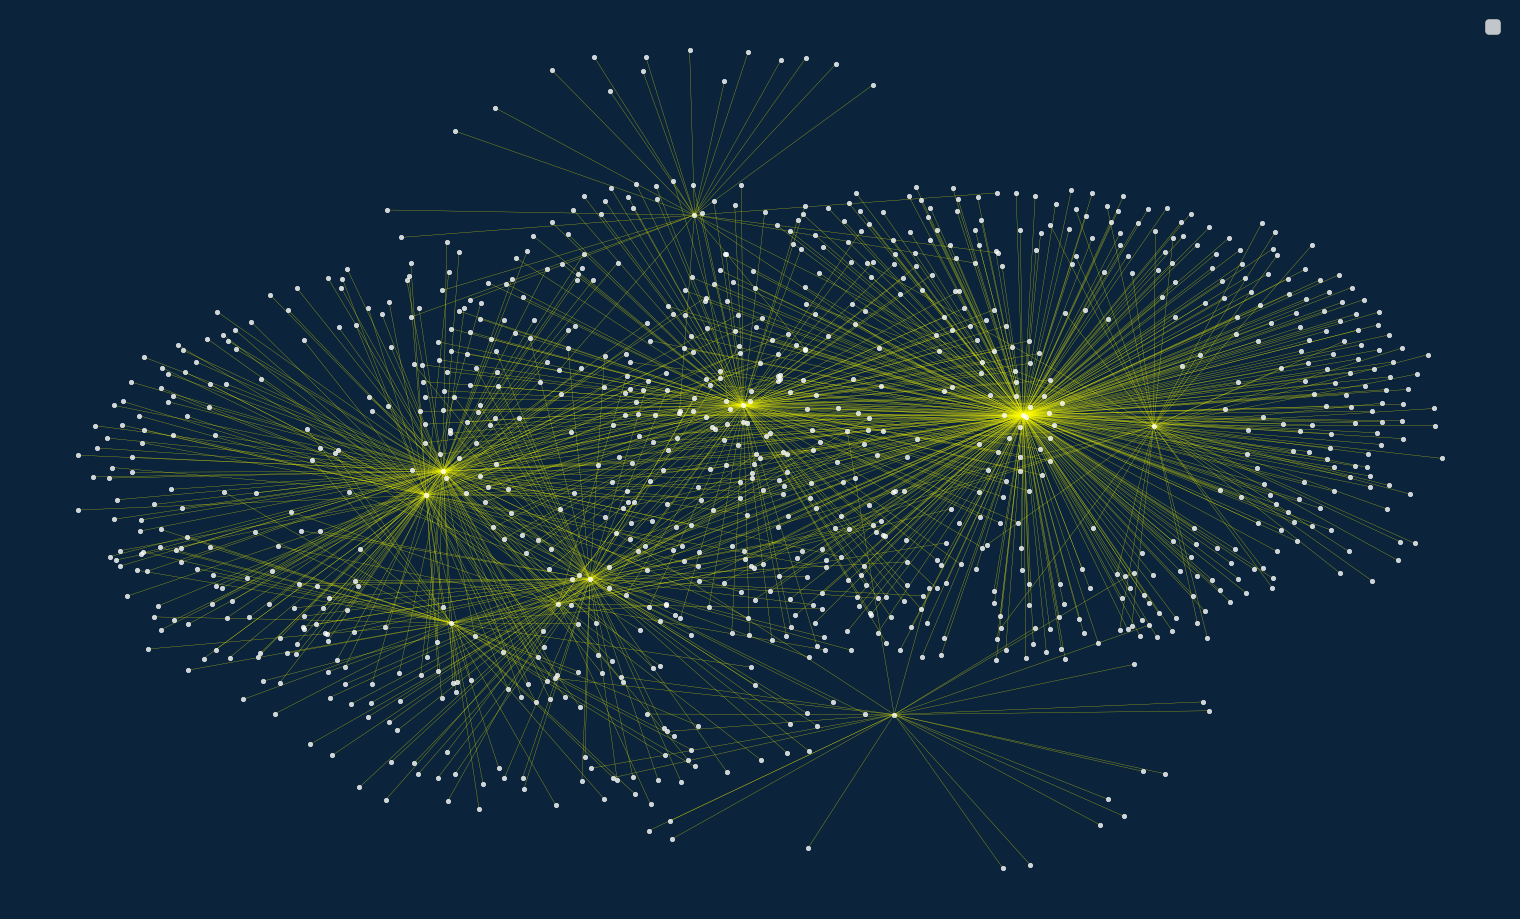

In [4]:
pd.set_option('precision',10)
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
size = [(degree[n]) for n in nodes]

#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 10, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

In [5]:
for i in sorted(G.nodes()):
    G.nodes[i]['Degree'] = G.degree(i)

In [6]:
nodes_data = pd.DataFrame([i[1] for i in G.nodes(data=True)], index=[i[0] for i in G.nodes(data=True)])
nodes_data = nodes_data.sort_values(by = ['Degree'], ascending = False)
nodes_data.index.names=['ID']
nodes_data.reset_index(level=0, inplace=True)

In [7]:
bet_cen = nx.betweenness_centrality(G)
df_bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
df_bet_cen.columns = ['betweenness_centrality']
df_bet_cen.index.names = ['ID']
df_bet_cen.reset_index(level=0, inplace=True)
analyse= pd.merge(nodes_data,df_bet_cen, on = ['ID'])

In [8]:
clust_coefficients = nx.clustering(G)
df_clust = pd.DataFrame.from_dict(clust_coefficients, orient='index')
df_clust.columns = ['clust_coefficient']
df_clust.index.names = ['ID']
df_clust.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clust, on = ['ID'])

In [9]:
clo_cen = nx.closeness_centrality(G)
df_clo = pd.DataFrame.from_dict(clo_cen, orient='index')
df_clo.columns = ['closeness_centrality']
df_clo.index.names = ['ID']
df_clo.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clo, on = ['ID'])

In [10]:
eig_cen = nx.eigenvector_centrality_numpy(G)
df_eig = pd.DataFrame.from_dict(eig_cen, orient='index')
df_eig.columns = ['eigenvector_centrality']
df_eig.index.names = ['ID']
df_eig.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_eig, on = ['ID'])

print(analyse)

            ID  Degree  betweenness_centrality  clust_coefficient  \
0    234684445     359            0.7569401592                  0   
1    226754592     154            0.4537892234                  0   
2    216072216     137            0.2350066231                  0   
3    183566364      88            0.1566864923                  0   
4     73498632      88            0.1566864923                  0   
..         ...     ...                     ...                ...   
994   39322832       1            0.0000000000                  0   
995   12771542       1            0.0000000000                  0   
996   55746782       1            0.0000000000                  0   
997  174031072       1            0.0000000000                  0   
998  231246833       1            0.0000000000                  0   

     closeness_centrality  eigenvector_centrality  
0            0.3401347451            0.7069631803  
1            0.2674028213            0.0103417366  
2            0.

In [11]:
df.iloc[1:1000]


,Unnamed: 0,member1,member2,weight
1,1,198737924,208201738,1
2,2,198737924,88664332,1
3,3,198737924,8640526,1
4,4,198737924,56356372,1
5,5,198737924,183880473,1
...,...,...,...,...
995,995,226754592,237417427,1
996,996,226754592,216892372,1
997,997,226754592,220648421,1
998,998,226754592,220916721,1
